<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#General-EDA" data-toc-modified-id="General-EDA-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>General EDA</a></span><ul class="toc-item"><li><span><a href="#Changing-dates-to-datetime-data-type" data-toc-modified-id="Changing-dates-to-datetime-data-type-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Changing dates to datetime data type</a></span></li><li><span><a href="#Exploring-was_answered" data-toc-modified-id="Exploring-was_answered-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Exploring <code>was_answered</code></a></span></li><li><span><a href="#Exploring-Sentiment-Values" data-toc-modified-id="Exploring-Sentiment-Values-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Exploring Sentiment Values</a></span><ul class="toc-item"><li><span><a href="#Histogram-of-Answers-Sentiment-Scores:" data-toc-modified-id="Histogram-of-Answers-Sentiment-Scores:-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Histogram of Answers Sentiment Scores:</a></span></li><li><span><a href="#Histogram-of-Questions-Sentiment-Scores" data-toc-modified-id="Histogram-of-Questions-Sentiment-Scores-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Histogram of Questions Sentiment Scores</a></span></li></ul></li><li><span><a href="#Exploring-Answers-Authors" data-toc-modified-id="Exploring-Answers-Authors-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Exploring Answers Authors</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Checking-the-answers-author-Id's" data-toc-modified-id="Checking-the-answers-author-Id's-1.4.0.1"><span class="toc-item-num">1.4.0.1&nbsp;&nbsp;</span>Checking the answers author Id's</a></span></li></ul></li></ul></li><li><span><a href="#Exploring-Scores" data-toc-modified-id="Exploring-Scores-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Exploring Scores</a></span><ul class="toc-item"><li><span><a href="#General-Stats-for-Question-and-Answer-Scores:" data-toc-modified-id="General-Stats-for-Question-and-Answer-Scores:-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>General Stats for Question and Answer Scores:</a></span></li><li><span><a href="#Exploring-answer_scores" data-toc-modified-id="Exploring-answer_scores-1.5.2"><span class="toc-item-num">1.5.2&nbsp;&nbsp;</span>Exploring <code>answer_scores</code></a></span></li><li><span><a href="#Exploring-questions_score" data-toc-modified-id="Exploring-questions_score-1.5.3"><span class="toc-item-num">1.5.3&nbsp;&nbsp;</span>Exploring <code>questions_score</code></a></span></li></ul></li><li><span><a href="#Exploring-dates-and-lengths-of-time-answered" data-toc-modified-id="Exploring-dates-and-lengths-of-time-answered-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Exploring dates and lengths of time answered</a></span></li></ul></li></ul></div>

# General EDA

In [1]:
import pandas as pd
# import regex as re

import matplotlib.pyplot as plt
import seaborn as sns

# from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# from nltk.tokenize import RegexpTokenizer
# from nltk.sentiment.vader import SentimentIntensityAnalyzer
# from sklearn.feature_extraction import stop_words, text

%config InlineBackend.figure_format = 'retina'


In [2]:
data = pd.read_csv('./Datasets/cleaned_w_sentiment.csv')
data.head(2)

,questions_id,questions_author_id,questions_date_added,questions_title,questions_body,questions_score,tag_id,tag_name,answers_id,answers_author_id,answers_date_added,answers_body,answers_score,was_answered,has_tag,questions_sentiment,answers_sentiment
0,332a511f1569444485cf7a7a556a5e54,8f6f374ffd834d258ab69d376dd998f5,2016-04-26 11:14:26+00:00,teacher career question,what is a maths teacher what is a ma...,1.0,14147.0,lecture,4e5f01128cae4f6d8fd697cec5dca60c,36ff3b3666df400f956f8335cf53e09e,2016-04-29 19:40:14+00:00,hi you are asking a very interesting question ...,0.0,1,1,0.4404,0.8122
1,332a511f1569444485cf7a7a556a5e54,8f6f374ffd834d258ab69d376dd998f5,2016-04-26 11:14:26+00:00,teacher career question,what is a maths teacher what is a ma...,1.0,27490.0,college,4e5f01128cae4f6d8fd697cec5dca60c,36ff3b3666df400f956f8335cf53e09e,2016-04-29 19:40:14+00:00,hi you are asking a very interesting question ...,0.0,1,1,0.4404,0.8122


In [3]:
data.describe()

,questions_score,tag_id,answers_score,was_answered,has_tag,questions_sentiment,answers_sentiment
count,180376.000000,180376.000000,180376.000000,180376.000000,180376.000000,180376.000000,180376.000000
mean,4.873115,16850.235325,0.448413,0.987027,0.990575,0.390779,0.763219
std,7.536732,10280.952759,0.936107,0.113158,0.096623,0.435442,0.359890
min,0.000000,0.000000,0.000000,0.000000,0.000000,-0.992900,-0.996900
25%,2.000000,9521.000000,0.000000,1.000000,1.000000,0.000000,0.726900
50%,4.000000,18351.000000,0.000000,1.000000,1.000000,0.440400,0.931300
75%,5.000000,25524.000000,1.000000,1.000000,1.000000,0.775500,0.979400
max,125.000000,39250.000000,30.000000,1.000000,1.000000,0.998300,1.000000


In [4]:
data.shape

(180376, 17)

In [5]:
data.dtypes

questions_id             object
questions_author_id      object
questions_date_added     object
questions_title          object
questions_body           object
questions_score         float64
tag_id                  float64
tag_name                 object
answers_id               object
answers_author_id        object
answers_date_added       object
answers_body             object
answers_score           float64
was_answered              int64
has_tag                   int64
questions_sentiment     float64
answers_sentiment       float64
dtype: object

In [6]:
data.isnull().sum()

questions_id               0
questions_author_id        0
questions_date_added       0
questions_title            0
questions_body             0
questions_score            0
tag_id                     0
tag_name                   0
answers_id                 0
answers_author_id          0
answers_date_added      2340
answers_body               0
answers_score              0
was_answered               0
has_tag                    0
questions_sentiment        0
answers_sentiment          0
dtype: int64

## Changing dates to datetime data type

In [7]:
data['answers_date_added'] = pd.to_datetime(data['answers_date_added'])
data['questions_date_added'] = pd.to_datetime(data['questions_date_added'])

In [8]:
data['questions_date_added']

0        2016-04-26 11:14:26+00:00
1        2016-04-26 11:14:26+00:00
2        2016-04-26 11:14:26+00:00
3        2016-05-20 16:48:25+00:00
4        2016-05-20 16:48:25+00:00
                    ...           
180371   2015-10-21 20:16:38+00:00
180372   2015-10-21 20:16:38+00:00
180373   2015-10-21 20:16:38+00:00
180374   2015-10-21 20:16:38+00:00
180375   2015-10-21 20:16:38+00:00
Name: questions_date_added, Length: 180376, dtype: datetime64[ns, UTC]

## Exploring `was_answered`

An initial look at `was_answered` stats shows that the majority of questions are answered.

In [9]:
data.groupby('was_answered')[['questions_score']].describe()

questions_score                                               
                       count      mean       std  min  25%  50%  75%    max
was_answered                                                               
0                     2340.0  0.755556  3.167693  0.0  0.0  0.0  1.0  123.0
1                   178036.0  4.927234  7.562493  0.0  2.0  4.0  5.0  125.0

In [10]:
data.groupby('was_answered')[['answers_score']].describe()

answers_score                                              
                     count      mean       std  min  25%  50%  75%   max
was_answered                                                            
0                   2340.0  0.000000  0.000000  0.0  0.0  0.0  0.0   0.0
1                 178036.0  0.454307  0.940817  0.0  0.0  0.0  1.0  30.0

We can see that the average question score for where questions weren't answered was 0.75 and when answered 4.9 (the highest score is 125, with most between 0-10). The scores work similiar to "upvotes" or "likes", 0 means 0 "upvotes", 5 means 5 "upvotes" etc. This intuitively makes sense, because questions with low or no upvotes are likely to go unanswered. 

The other things to note is that average answers_score is .45. Again, on the upvote scale above, so it looks like the majority of answers aren't getting "upvotes".

In [12]:
data.groupby('was_answered').mean()

,questions_score,tag_id,answers_score,has_tag,questions_sentiment,answers_sentiment
was_answered,,,,,,
0,0.755556,19804.312393,0.000000,0.994017,0.273097,0.00000
1,4.927234,16811.408681,0.454307,0.990530,0.392326,0.77325


The majority of questions are answered as shown below: (1: answered, 0:not answered)

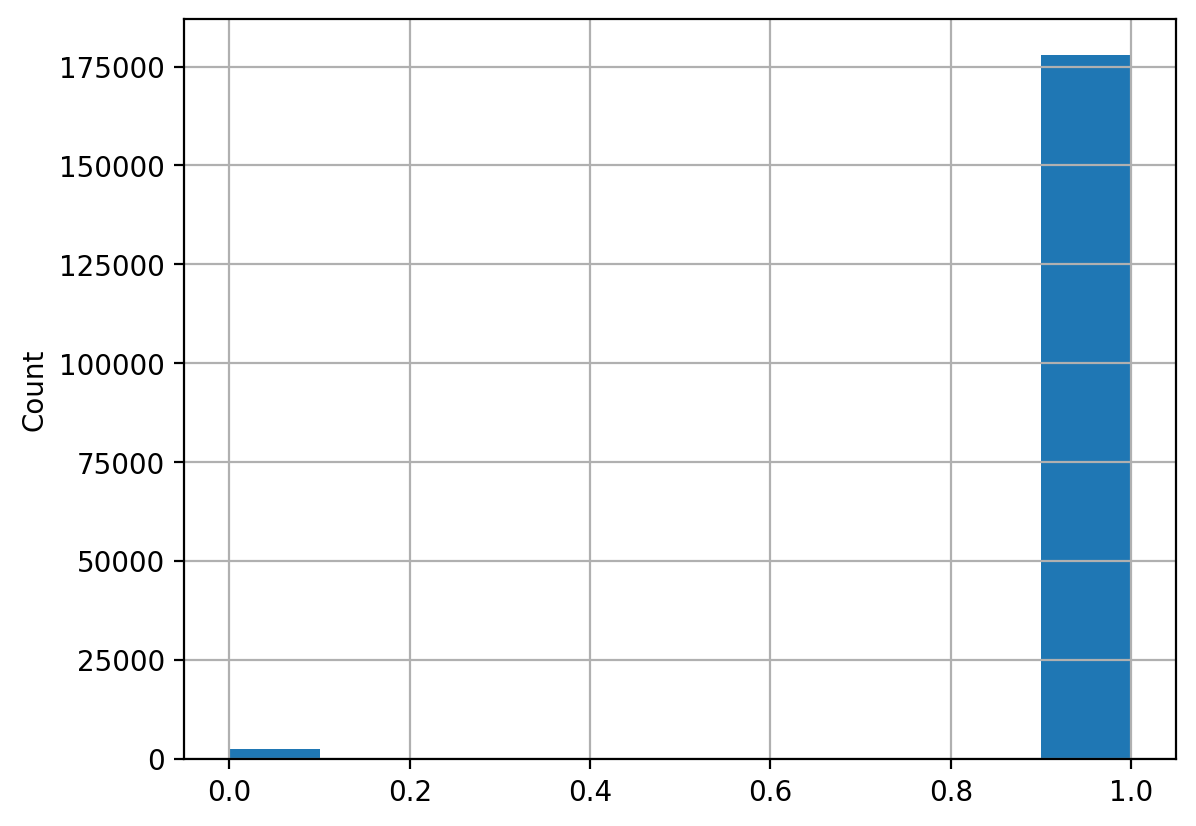

In [13]:
data['was_answered'].hist()
plt.ylabel("Count");

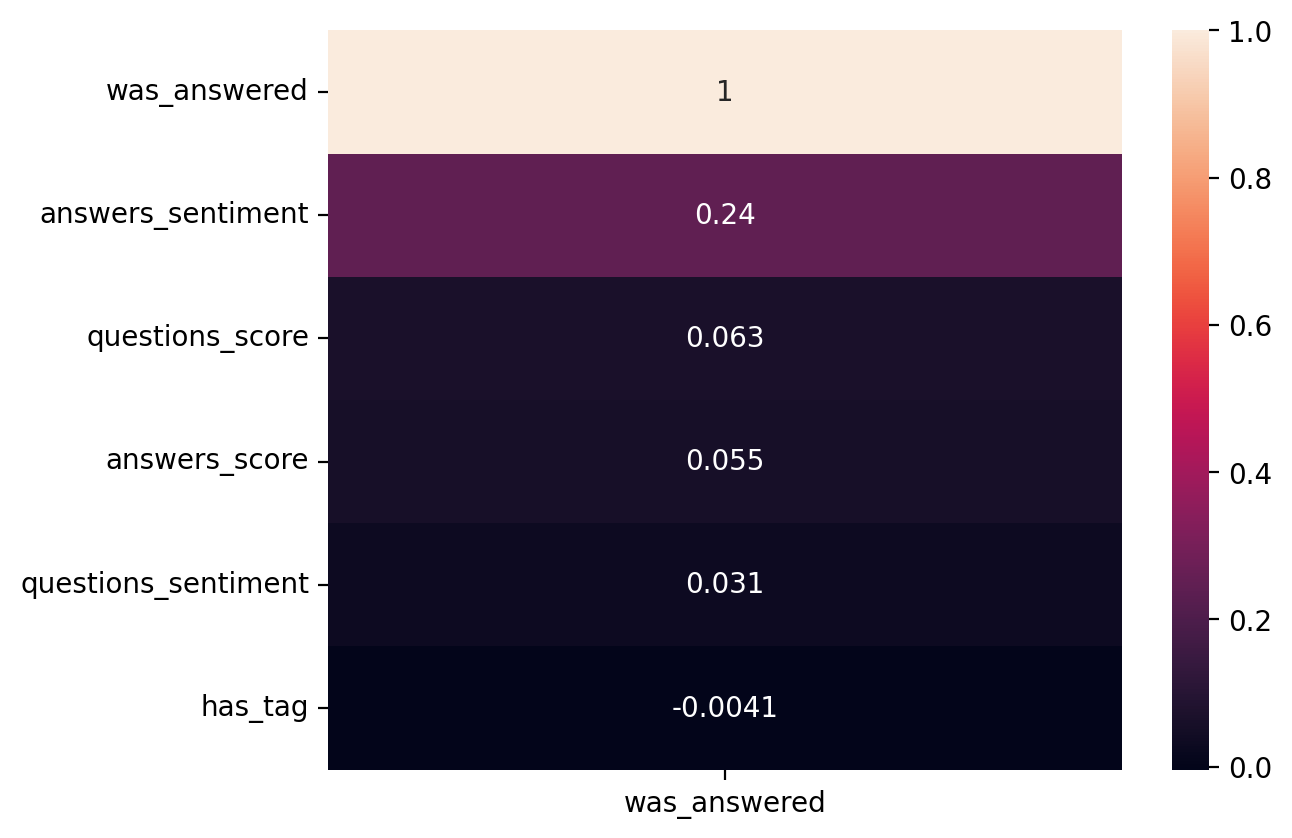

In [14]:
qa_corr = data.drop(columns='tag_id').corr()[['was_answered']].dropna().sort_values('was_answered', ascending=False)

sns.heatmap(qa_corr, annot=True);

## Exploring Sentiment Values

In the NLP EDA notebook, I calculated the 'sentiment score' of the questions and answers body. I did this using the Natural Language Tool Kit (NLTK) library. The sentiment score parses through the text and awards words a positive or negative score. Words like "like", "love" "happy" etc. are attributed to a positive score, while "dislike", "annoyed" etc. are given negative scores. Words like "the", "it" etc. are considered neutral. NLTK then aggregates a score based on all the words in the passage. Though this is an imperfect approach (i.e. attributing a positive score to "don't like"  or the reverse), it provides a general understanding of the tone of the text. 

In the stats overview below, grouped by 'was_answered', one can see that the average questions_sentiment is relatively similiar for questions that were answered versus those that were not answered. Since not all the questions are answered, there are all 0's in the `answers_sentiment` score where `was_answered` is 0.

**The scores range from -1 to 1.** With 1 being positive, -1: negative.

In [15]:
data.groupby('was_answered')[['questions_sentiment', 'answers_sentiment']].describe()

questions_sentiment                                           \
                           count      mean       std     min  25%     50%   
was_answered                                                                
0                         2340.0  0.273097  0.403143 -0.9011  0.0  0.2023   
1                       178036.0  0.392326  0.435640 -0.9929  0.0  0.4404   

                             answers_sentiment                             \
                 75%     max             count     mean       std     min   
was_answered                                                                
0             0.6369  0.9785            2340.0  0.00000  0.000000  0.0000   
1             0.7783  0.9983          178036.0  0.77325  0.351378 -0.9969   

                                          
                25%     50%     75%  max  
was_answered                              
0             0.000  0.0000  0.0000  0.0  
1             0.743  0.9331  0.9797  1.0

### Histogram of Answers Sentiment Scores:

The majority of `answers_sentiment` scores are close to 1, with a small bump just below 0. This is good and expected; the point of the platform is to empower and serve youth by answering their career questions. Negative sentiment scores would indicate that the professionals on the platform are not answering kindly, and should be flagged for investigation and possible removal from the platform. That said, humans are much better at discovering tone from the text, and should be reviewed manually or with further analysis before any action is taken.

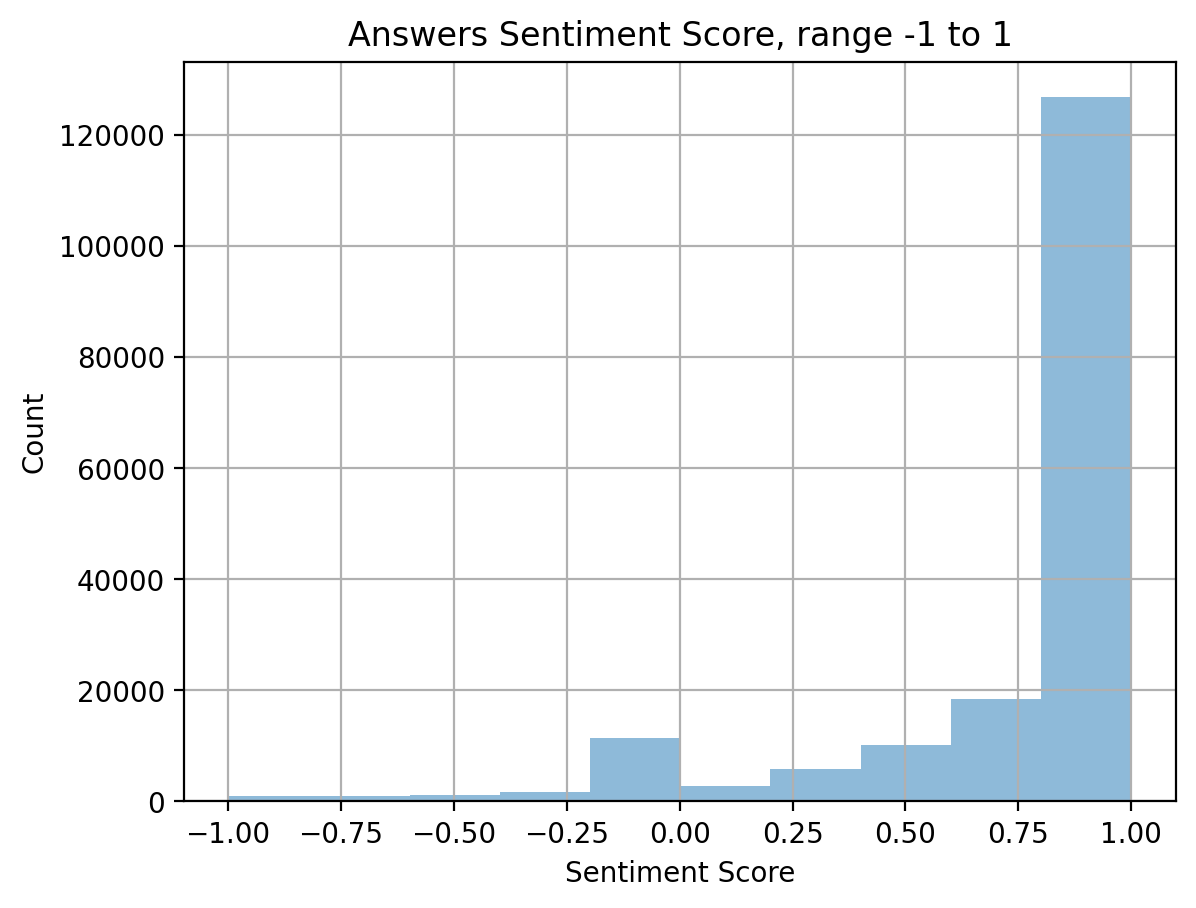

In [16]:
#Overall
data['answers_sentiment'].hist(alpha=.5);
plt.title('Answers Sentiment Score, range -1 to 1');
plt.ylabel("Count")
plt.xlabel("Sentiment Score");

### Histogram of Questions Sentiment Scores

Though there is a general trend for questions to have a positive sentiment score, we can see that the distribution of scores vary more than the answer scores.

#TODO <span style ='color:red'> In further anyalis, it would be interesting to see how the sentiment score correlates to how quickly a question is answered.

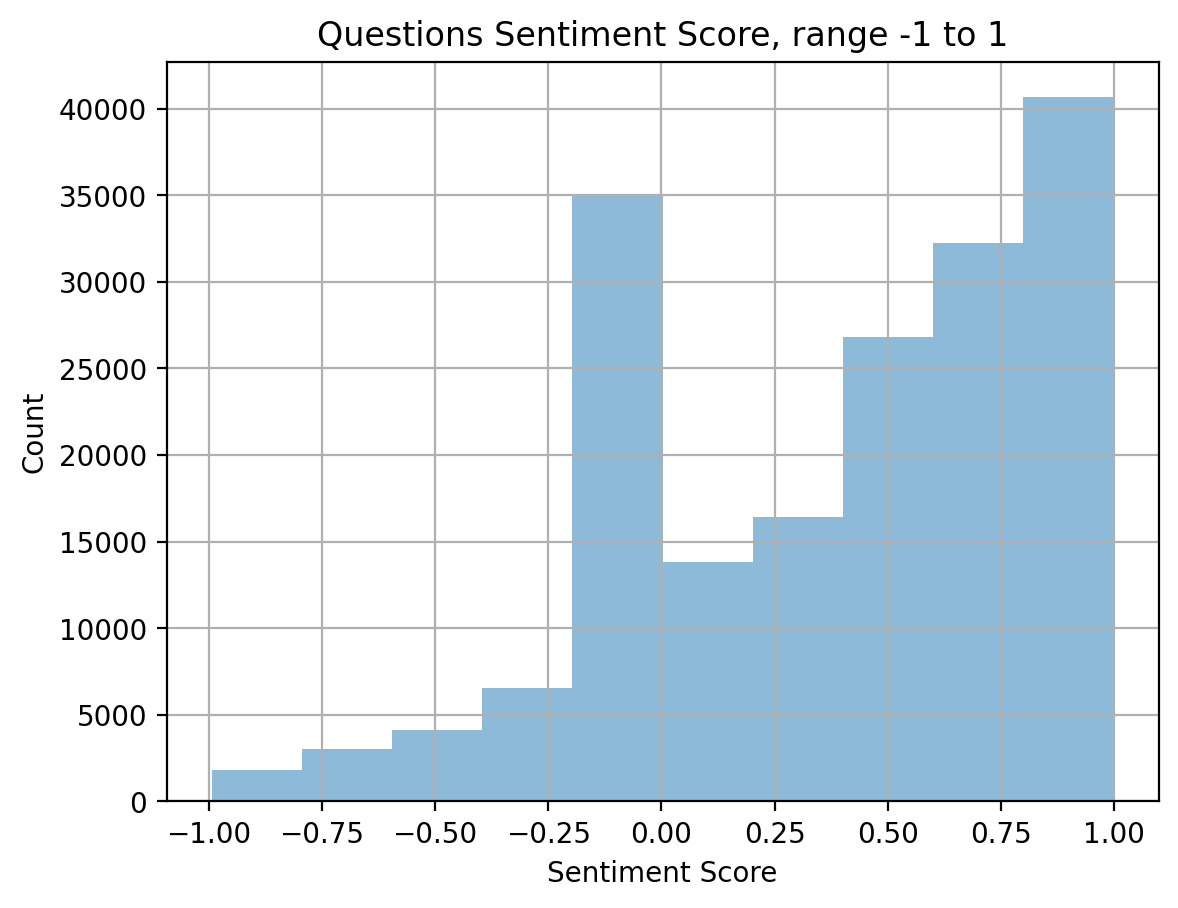

In [18]:
data['questions_sentiment'].hist(alpha=.5)
plt.title('Questions Sentiment Score, range -1 to 1');
plt.ylabel("Count")
plt.xlabel("Sentiment Score");

## Exploring Answers Authors

We wanted to know more about who's answering the questions. Below we're looking at how many people are answering questions and how many questions they're answering.

The total number of unique answer authors is 10,170. This is compared to 12,329 question authors and 23,931 unique questions.

#TODO : What tags are being answered? Is there a most popular tag? Are the tags they're answering part of their speciality. 

In [20]:
print("number of unique answer authors::", data['answers_author_id'].nunique())
print("number of unique question authors:", data['questions_author_id'].nunique())
print("number of unique questions:", data['questions_id'].nunique())

number of unique answer authors:: 10170
number of unique question authors: 12329
number of unique questions: 23931


#### Checking the answers author Id's

In [25]:
data.groupby('answers_author_id').mean().round(1)

,questions_score,tag_id,answers_score,was_answered,has_tag,questions_sentiment,answers_sentiment
answers_author_id,,,,,,,
00009a0f9bda43eba47104e9ac62aff5,5.3,14268.4,0.0,1.0,1.0,0.3,1.0
000d4635e5da41e3bfd83677ee11dda4,4.2,16175.8,0.0,1.0,1.0,0.5,0.9
00271cc10e0245fba4a35e76e669c281,3.0,18818.7,0.0,1.0,1.0,0.4,0.9
003cc21be89d4e42bc4424131a378e86,3.2,16936.2,0.0,1.0,1.0,0.3,0.6
0046ab8089c04b3a8df3f8c28621a818,8.0,18432.1,0.3,1.0,0.9,-0.0,0.9
...,...,...,...,...,...,...,...
ffe2f26d5c174e13b565d026e1d8c503,2.9,14853.4,0.3,1.0,1.0,0.1,0.6
ffeaf7114b59443581b8acb5a9bfb38a,1.0,13738.0,0.0,1.0,1.0,0.9,1.0
fffa0ff907ff4a9a84cb1b142911eee1,1.0,15205.3,1.0,1.0,1.0,0.0,1.0


Box plot with data means rounded to 2 decimals:

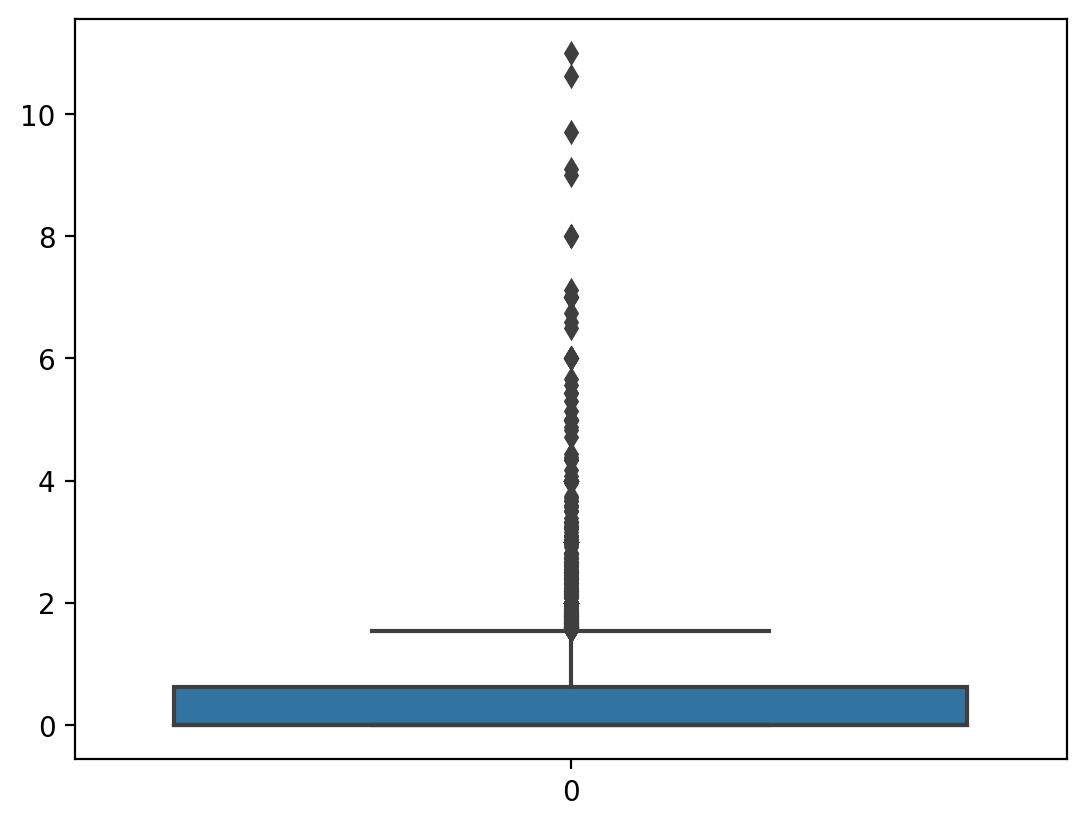

In [28]:
sns.boxplot(data.groupby('answers_author_id').mean().round(2)['answers_score']);

Box plot with data means rounded to 0 decimal places:

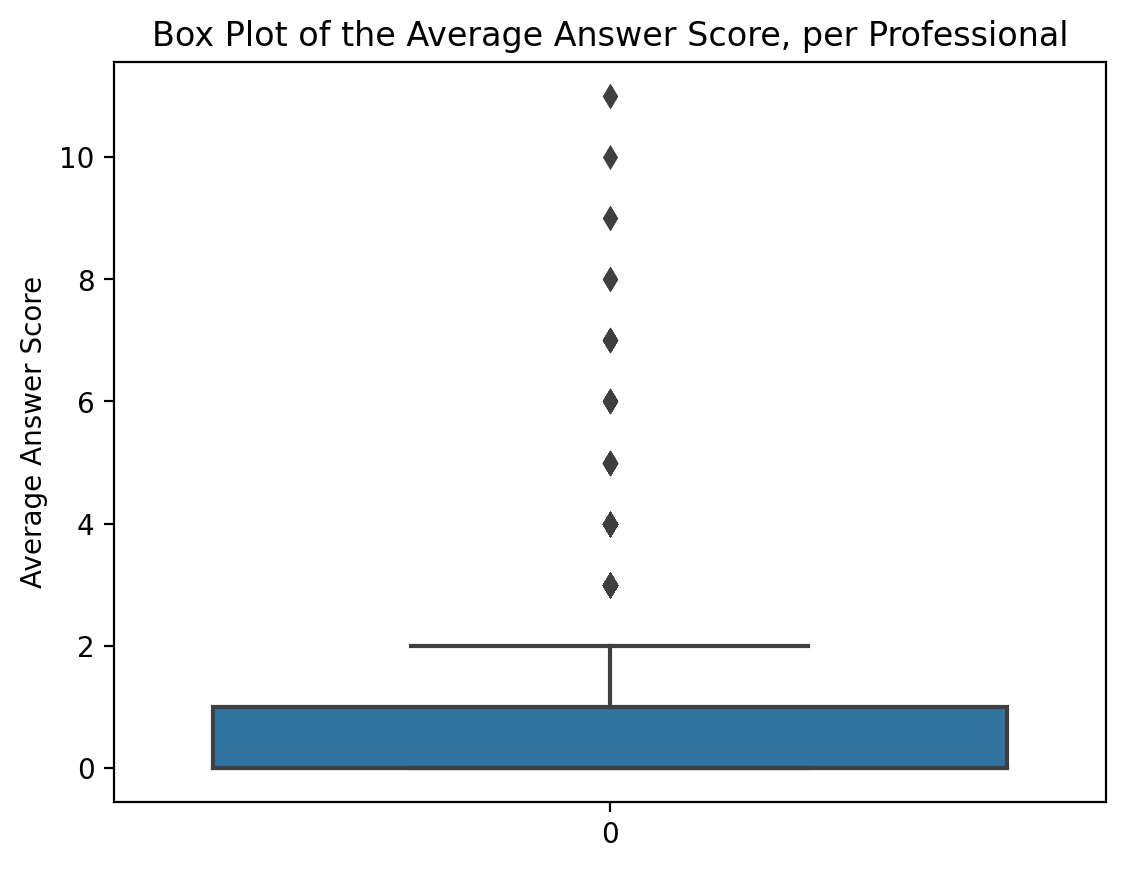

In [7]:
sns.boxplot(data.groupby('answers_author_id').mean().round(0)['answers_score']);
plt.ylabel('Average Answer Score');
plt.title('Box Plot of the Average Answer Score, per Professional');

In [17]:
data.groupby('answers_author_id').mean().round(0)['answers_score'].value_counts()

0.0     7346
1.0     2108
2.0      467
3.0      135
4.0       63
5.0       19
6.0       13
7.0       11
8.0        3
9.0        2
11.0       2
10.0       1
Name: answers_score, dtype: int64

In looking at the intital stats above, I wanted understand how many professionals had a high average answer score. Below are a few graphs outputs that look at the top average `answers_score`.

Authors with top 50 average `answers_score`:

In [32]:
data.groupby('answers_author_id').mean().sort_values('answers_score', ascending=False).head(50)[['answers_score', 'questions_score','answers_sentiment','questions_sentiment']]

,answers_score,questions_score,answers_sentiment,questions_sentiment
answers_author_id,,,,
4dbdd4b99f80446798b3ab477f049285,11.000000,9.000000,0.994900,0.601900
c97347e2441b40a69577cf1627b81a6a,10.625000,16.875000,0.988812,0.457612
a61aa494aed848cc87ba745a24178922,9.714286,16.428571,0.973871,0.823743
1ec14aee9311480681dfa81b0f193de8,9.100000,15.200000,0.862150,0.180570
bdcdf938f015413fb3cb981836ca3dab,9.000000,24.000000,0.957800,0.757900
39a60344b603488ba9bb62c5c8b3be97,8.000000,14.000000,0.993800,0.924800
9ce1a6a0bb3c4cc49bc6414788b80c49,8.000000,6.000000,0.956400,0.951700
664a948f3d014b0d9251af1f0469c43e,8.000000,43.000000,0.991600,0.596600
d2c9d0b9fff54e5f932144d5eb5015f0,7.125000,11.750000,0.981862,0.530875


How many professionals had an average `answers_score` above 2.0? After some trial and error we can see that 319 out of 10170 professionals have an `answers_score` above 2.0

In [33]:
data.groupby('answers_author_id').mean().sort_values('answers_score', ascending=False)[['answers_score']] > 2

,answers_score
answers_author_id,
4dbdd4b99f80446798b3ab477f049285,True
c97347e2441b40a69577cf1627b81a6a,True
a61aa494aed848cc87ba745a24178922,True
1ec14aee9311480681dfa81b0f193de8,True
bdcdf938f015413fb3cb981836ca3dab,True
...,...
6f03318a272f460d8df27914cd6de1f1,False
6f02a3e55abe417a8cde5f803a224381,False
6efbe6486ab546649f427401b17a8f32,False


In [37]:
data.groupby('answers_author_id').mean().sort_values('answers_score', ascending=False).loc[\
    data.groupby('answers_author_id').mean().sort_values('answers_score', ascending=False)['answers_score'] > 2]

,questions_score,tag_id,answers_score,was_answered,has_tag,questions_sentiment,answers_sentiment
answers_author_id,,,,,,,
4dbdd4b99f80446798b3ab477f049285,9.000000,9181.000000,11.000000,1.0,1.000000,0.601900,0.994900
c97347e2441b40a69577cf1627b81a6a,16.875000,10614.125000,10.625000,1.0,1.000000,0.457612,0.988812
a61aa494aed848cc87ba745a24178922,16.428571,15048.000000,9.714286,1.0,1.000000,0.823743,0.973871
1ec14aee9311480681dfa81b0f193de8,15.200000,9751.500000,9.100000,1.0,1.000000,0.180570,0.862150
bdcdf938f015413fb3cb981836ca3dab,24.000000,14096.000000,9.000000,1.0,1.000000,0.757900,0.957800
...,...,...,...,...,...,...,...
94477b1600174ba8a6caf491dbe3bc5b,5.100000,12608.200000,2.100000,1.0,1.000000,0.511190,0.510350
fe49d48526dd4c92977224777b25aee2,4.031250,16529.187500,2.093750,1.0,1.000000,0.160106,0.903906
d05414b6022f4a279fc4c47be2dd8372,5.262500,13871.712500,2.087500,1.0,1.000000,0.053438,0.773060


In [38]:
# Saving the professionals with the highest answers_score in a dataframe called: top_prof_df
top_prof_df = data.groupby('answers_author_id').mean().sort_values('answers_score', ascending=False).head(319)

# Viewing the professionals with the highest answers_score in a dataframe called: top_prof_df
top_prof_df[['answers_score', 'questions_score']]

,answers_score,questions_score
answers_author_id,,
4dbdd4b99f80446798b3ab477f049285,11.000000,9.000000
c97347e2441b40a69577cf1627b81a6a,10.625000,16.875000
a61aa494aed848cc87ba745a24178922,9.714286,16.428571
1ec14aee9311480681dfa81b0f193de8,9.100000,15.200000
bdcdf938f015413fb3cb981836ca3dab,9.000000,24.000000
...,...,...
94477b1600174ba8a6caf491dbe3bc5b,2.100000,5.100000
fe49d48526dd4c92977224777b25aee2,2.093750,4.031250
d05414b6022f4a279fc4c47be2dd8372,2.087500,5.262500


How many professionals had an average answers_score above 1.0?

In [18]:
data.groupby('answers_author_id').mean().sort_values('answers_score', ascending=False).loc[\
    data.groupby('answers_author_id').mean().sort_values('answers_score', ascending=False)['answers_score'] > 1].shape

(1017, 7)

## Exploring Scores

Below is a look at the general stats, grouped by `was_answered` for question and answer scores. Unsurprisingly the average question score for questions that were answered is several points higher than wasn't answered. That said, it's interesting to see that the average score for questions that weren't answered was above 0, or almost zero. In looking at the max `question_score` for questions that weren't answered, we see a question had 123 "upvotes" and still wasn't answered. This is an anomaly, but interesting. 

### General Stats for Question and Answer Scores:

In [41]:
data.groupby('was_answered')[['questions_score', 'answers_score']].describe()

questions_score                                                 \
                       count      mean       std  min  25%  50%  75%    max   
was_answered                                                                  
0                     2340.0  0.755556  3.167693  0.0  0.0  0.0  1.0  123.0   
1                   178036.0  4.927234  7.562493  0.0  2.0  4.0  5.0  125.0   

             answers_score                                                
                     count      mean       std  min  25%  50%  75%   max  
was_answered                                                              
0                   2340.0  0.000000  0.000000  0.0  0.0  0.0  0.0   0.0  
1                 178036.0  0.454307  0.940817  0.0  0.0  0.0  1.0  30.0

### Exploring `answer_scores`

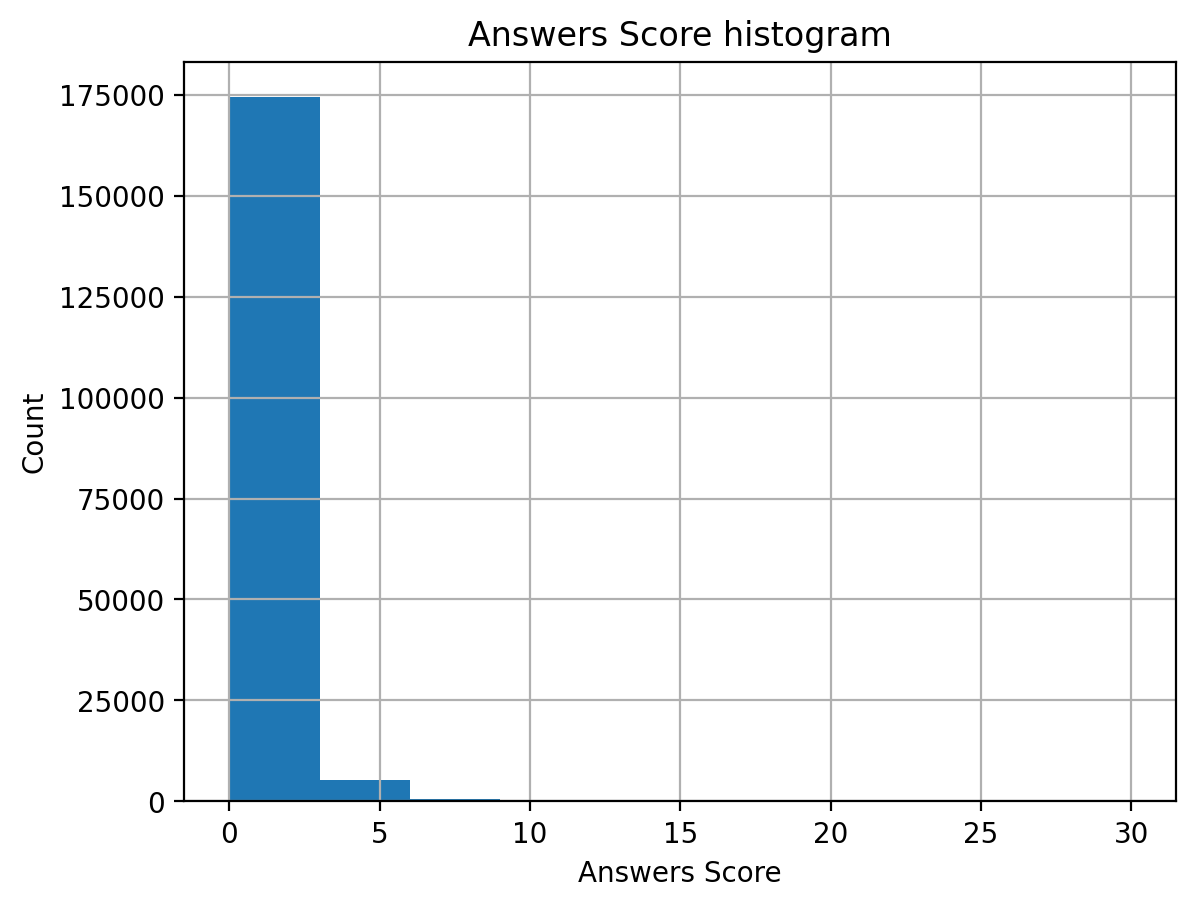

In [53]:
data['answers_score'].hist();
plt.title('Answers Score histogram');
plt.ylabel("Count")
plt.xlabel("Answers Score");

There are 23 unique values for answer scores

In [43]:
data['answers_score'].nunique()

23

Below outputs the frequency for how often each answer score value occurs:

In [44]:
data['answers_score'].value_counts()

0.0     127954
1.0      36007
2.0      10334
3.0       3404
4.0       1414
5.0        562
6.0        278
7.0        164
8.0        110
9.0         35
12.0        26
11.0        24
10.0        15
14.0        13
13.0        13
15.0         6
17.0         4
18.0         3
25.0         3
22.0         3
20.0         2
19.0         1
30.0         1
Name: answers_score, dtype: int64

Similar to above, below graphs the frequency for how often each answer score value occurs:

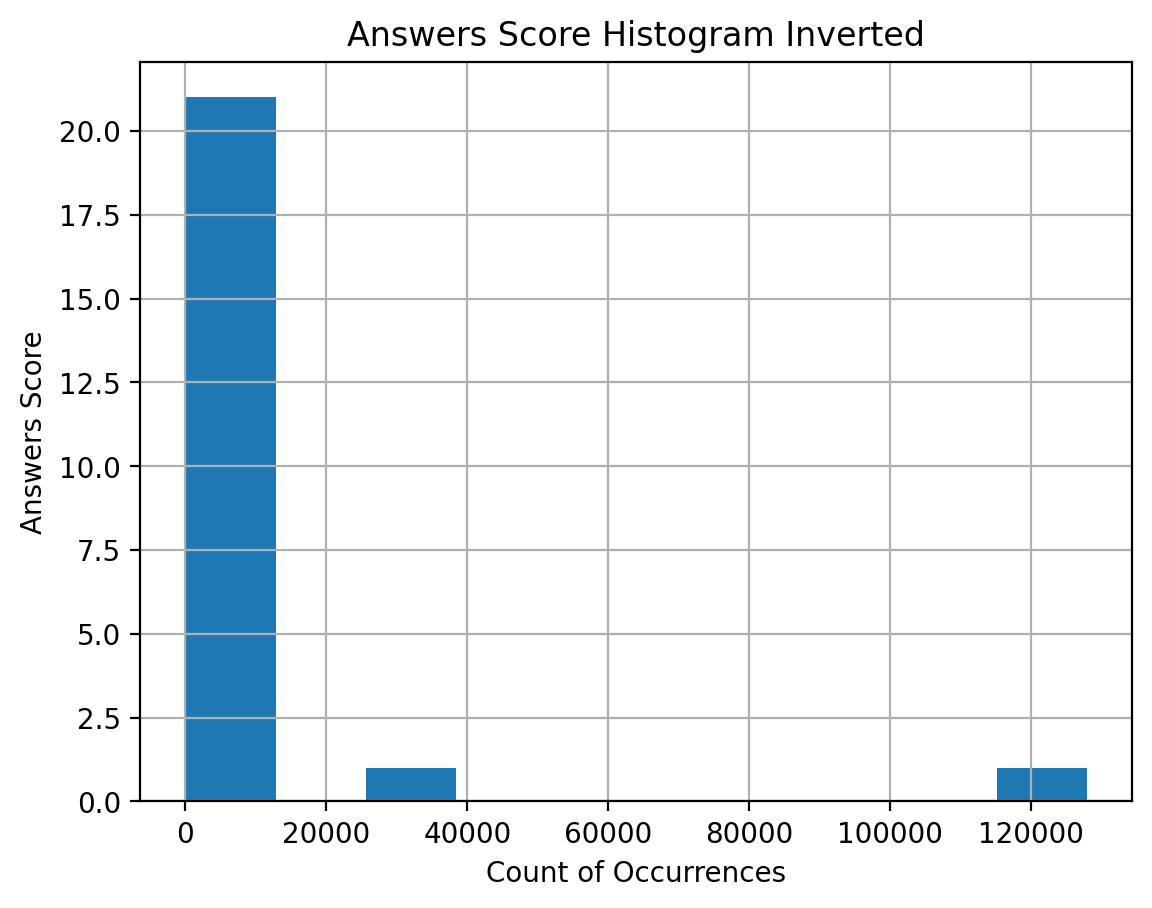

In [54]:
data['answers_score'].value_counts().hist();
plt.title('Answers Score Histogram Inverted');
plt.ylabel("Answers Score")
plt.xlabel("Count of Occurrences");

Taking a closer look at the general stats, distribution, and quartiles for answer_scores:

In [55]:
data['answers_score'].describe()

count    180376.000000
mean          0.448413
std           0.936107
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          30.000000
Name: answers_score, dtype: float64

The boxplot provides a good visual for how the answer scores and spread. The majority of scores are between 0 and 1. With outliers above about 2. Since there can't be negative scores, there are no outliers to the left of the graph.

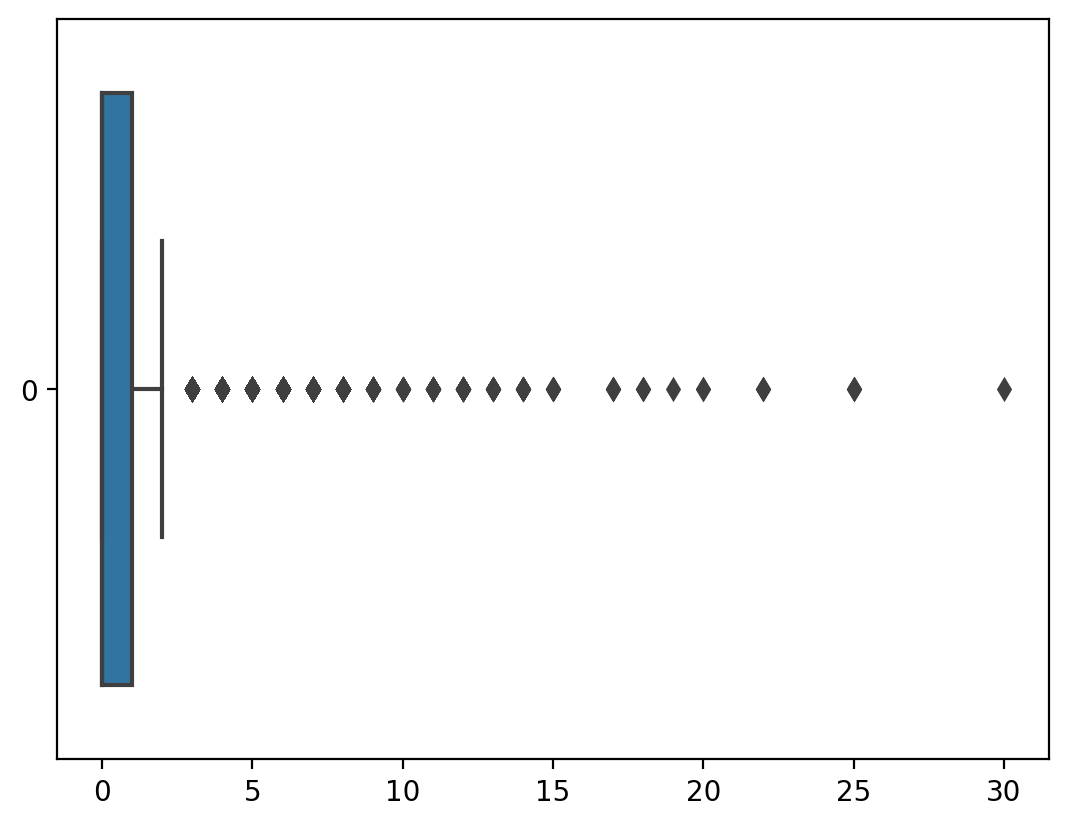

In [59]:
sns.boxplot(data['answers_score'], orient='h');

### Exploring `questions_score`

There are 75 unique question scores

In [60]:
data['questions_score'].nunique()

75

Taking a closer look at the general stats, distribution, and quartiles for answer_scores:

In [61]:
data['questions_score'].describe()

count    180376.000000
mean          4.873115
std           7.536732
min           0.000000
25%           2.000000
50%           4.000000
75%           5.000000
max         125.000000
Name: questions_score, dtype: float64

The boxplot provides a good visual for how the question scores and spread. The majority of scores are between 2 and 4. With outliers above about 9. 

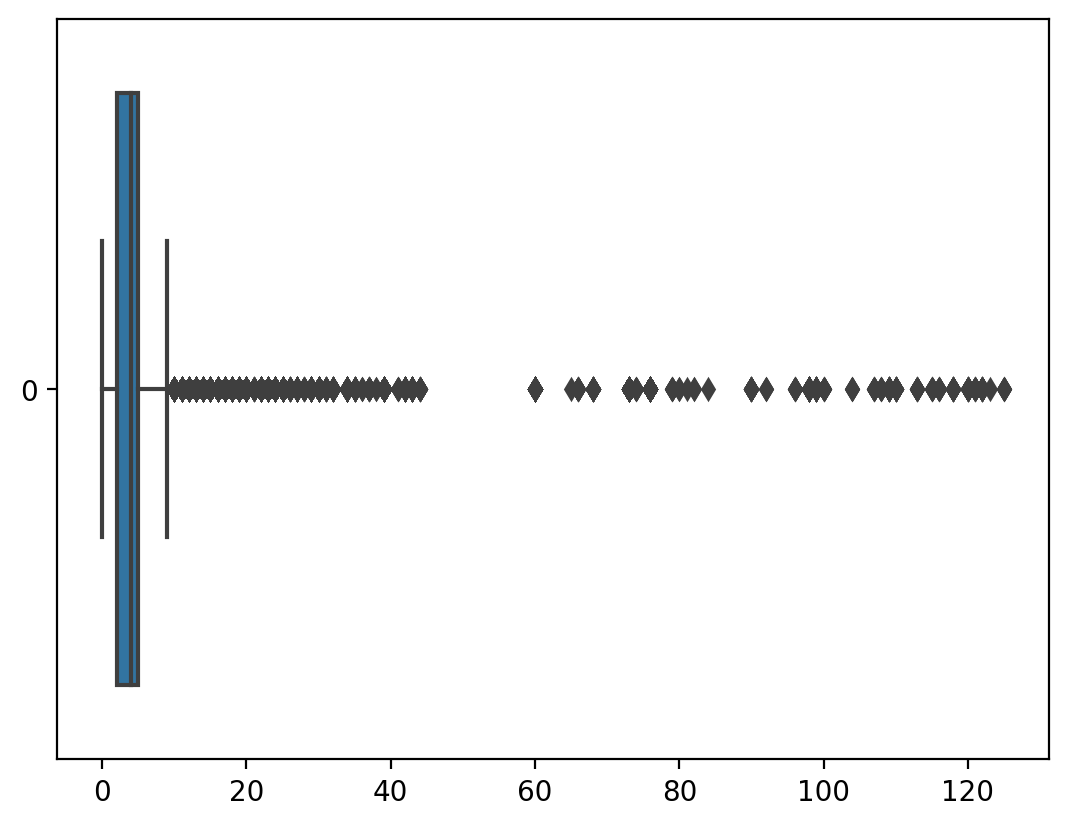

In [62]:
sns.boxplot(data['questions_score'], orient='h');

A deeper dive into the distribution of `quesions_scores`shows just how many of the scores are between 0-5, and how few are above 5.

Text(0.5, 0, 'Questions Score')

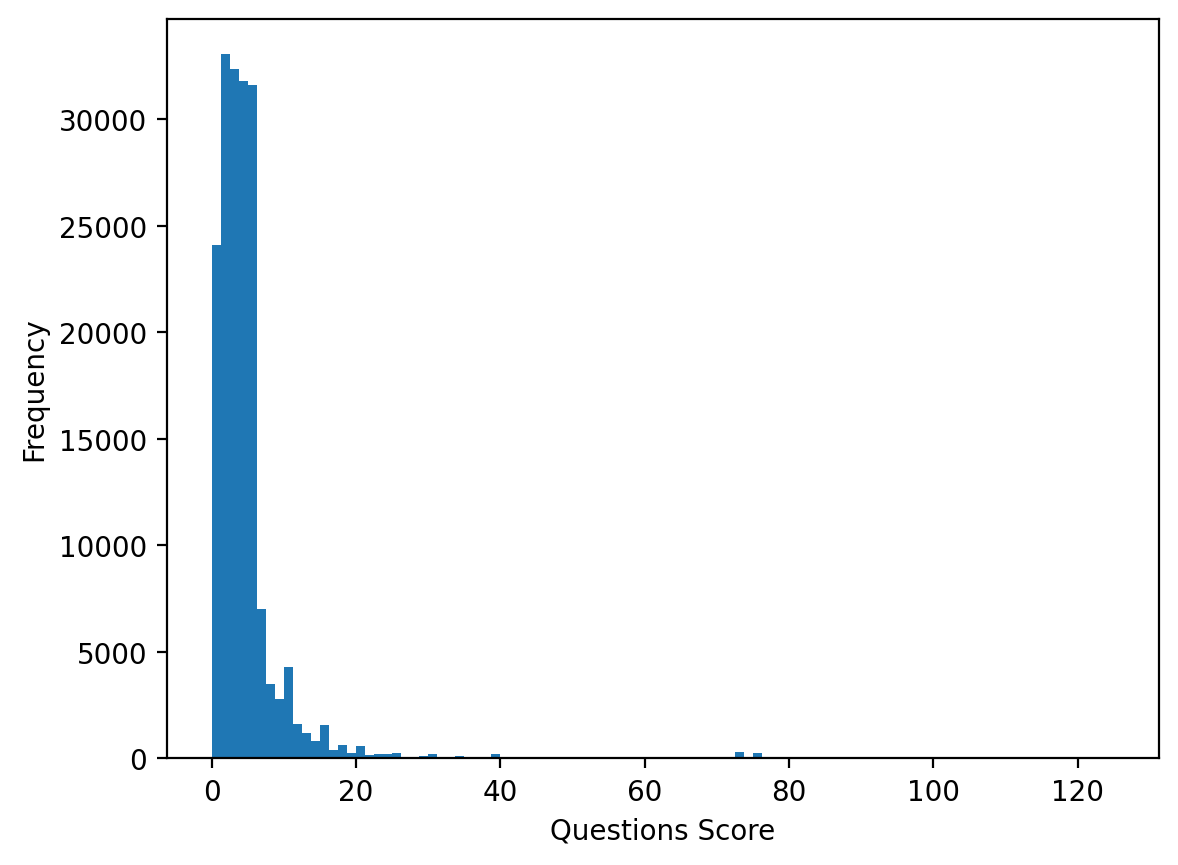

In [64]:
data['questions_score'].plot(kind='hist', bins=100);
plt.xlabel('Questions Score')

## Exploring dates and lengths of time answered

Creating a column called `time_to_answer` that is a calcuation of the `answers_date_added` minus `questions_date_added` columns. The data is in date time units.

In [55]:
data['time_to_answer'] = data['answers_date_added'] - data['questions_date_added']

data['time_to_answer_secs'] = data['time_to_answer'].dt.days*24*60*60 + data['time_to_answer'].dt.seconds

# [x.strftime("%Y-%m-%d %H:%M:%S") for x in data['time_to_answer']]
data.head(10)

,questions_id,questions_author_id,questions_date_added,questions_title,questions_body,questions_score,tag_id,tag_name,answers_id,answers_author_id,answers_date_added,answers_body,answers_score,was_answered,has_tag,questions_sentiment,answers_sentiment,time_to_answer,time_to_answer_secs
0,332a511f1569444485cf7a7a556a5e54,8f6f374ffd834d258ab69d376dd998f5,2016-04-26 11:14:26+00:00,teacher career question,what is a maths teacher what is a ma...,1.0,14147.0,lecture,4e5f01128cae4f6d8fd697cec5dca60c,36ff3b3666df400f956f8335cf53e09e,2016-04-29 19:40:14+00:00,hi you are asking a very interesting question ...,0.0,1,1,0.4404,0.8122,3 days 08:25:48,289548.0
1,332a511f1569444485cf7a7a556a5e54,8f6f374ffd834d258ab69d376dd998f5,2016-04-26 11:14:26+00:00,teacher career question,what is a maths teacher what is a ma...,1.0,27490.0,college,4e5f01128cae4f6d8fd697cec5dca60c,36ff3b3666df400f956f8335cf53e09e,2016-04-29 19:40:14+00:00,hi you are asking a very interesting question ...,0.0,1,1,0.4404,0.8122,3 days 08:25:48,289548.0
2,332a511f1569444485cf7a7a556a5e54,8f6f374ffd834d258ab69d376dd998f5,2016-04-26 11:14:26+00:00,teacher career question,what is a maths teacher what is a ma...,1.0,21438.0,professor,4e5f01128cae4f6d8fd697cec5dca60c,36ff3b3666df400f956f8335cf53e09e,2016-04-29 19:40:14+00:00,hi you are asking a very interesting question ...,0.0,1,1,0.4404,0.8122,3 days 08:25:48,289548.0
3,eb80205482e4424cad8f16bc25aa2d9c,acccbda28edd4362ab03fb8b6fd2d67b,2016-05-20 16:48:25+00:00,i want to become an army officer what can i d...,i am priyanka from bangalore now am in th ...,5.0,27.0,military,ada720538c014e9b8a6dceed09385ee3,2aa47af241bf42a4b874c453f0381bd4,2018-05-01 14:19:08+00:00,hi i joined the army after i attended college...,0.0,1,1,0.3098,0.9322,710 days 21:30:43,61421443.0
4,eb80205482e4424cad8f16bc25aa2d9c,acccbda28edd4362ab03fb8b6fd2d67b,2016-05-20 16:48:25+00:00,i want to become an army officer what can i d...,i am priyanka from bangalore now am in th ...,5.0,27.0,military,eaa66ef919bc408ab5296237440e323f,cbd8f30613a849bf918aed5c010340be,2018-05-02 02:41:02+00:00,dear priyanka greetings i have answered this ...,0.0,1,1,0.3098,0.9982,711 days 09:52:37,61465957.0
5,eb80205482e4424cad8f16bc25aa2d9c,acccbda28edd4362ab03fb8b6fd2d67b,2016-05-20 16:48:25+00:00,i want to become an army officer what can i d...,i am priyanka from bangalore now am in th ...,5.0,18016.0,army,ada720538c014e9b8a6dceed09385ee3,2aa47af241bf42a4b874c453f0381bd4,2018-05-01 14:19:08+00:00,hi i joined the army after i attended college...,0.0,1,1,0.3098,0.9322,710 days 21:30:43,61421443.0
6,eb80205482e4424cad8f16bc25aa2d9c,acccbda28edd4362ab03fb8b6fd2d67b,2016-05-20 16:48:25+00:00,i want to become an army officer what can i d...,i am priyanka from bangalore now am in th ...,5.0,18016.0,army,eaa66ef919bc408ab5296237440e323f,cbd8f30613a849bf918aed5c010340be,2018-05-02 02:41:02+00:00,dear priyanka greetings i have answered this ...,0.0,1,1,0.3098,0.9982,711 days 09:52:37,61465957.0
7,4ec31632938a40b98909416bdd0decff,f2c179a563024ccc927399ce529094b5,2017-02-08 19:13:38+00:00,will going abroad for your first job increase ...,im planning on going abroad for my first job ...,2.0,29867.0,overseas,1a6b3749d391486c9e371fbd1e605014,7e72a630c303442ba92ff00e8ea451df,2017-05-10 19:00:47+00:00,i work for a global company who values highly ...,0.0,1,1,0.5803,0.9001,90 days 23:47:09,7861629.0
8,4ec31632938a40b98909416bdd0decff,f2c179a563024ccc927399ce529094b5,2017-02-08 19:13:38+00:00,will going abroad for your first job increase ...,im planning on going abroad for my first job ...,2.0,23135.0,working abroad,1a6b3749d391486c9e371fbd1e605014,7e72a630c303442ba92ff00e8ea451df,2017-05-10 19:00:47+00:00,i work for a global company who values highly ...,0.0,1,1,0.5803,0.9001,90 days 23:47:09,7861629.0
9,2f6a9a99d9b24e5baa50d40d0ba50a75,2c30ffba444e40eabb4583b55233a5a4,2017-09-01 14:05:32+00:00,to become a specialist in business management...,i hear business management is a hard way to ge...,2.0,477

In [56]:
data[['time_to_answer']].head()

,time_to_answer
0,3 days 08:25:48
1,3 days 08:25:48
2,3 days 08:25:48
3,710 days 21:30:43
4,711 days 09:52:37


General stats for how long it takes for a question to be answered. As we can see here that the mean is 142 days, while the median is 22 days. The average is heavily skewed by the max amount of days it took to answer a question; 2,562, which is about 7 years. This is highly suspicious that a question took 7 years to be answered. Additionally, the min is negative, and an answer to a question can't be posted before it was asked. Since the data was likely auto-generated from the site, it's unlikely it's an imputation error. It may be a merging error due to how messy the data has been in general. The other possibility is that if an answer was posted for a different similar question, it might be linked to the new question (this would have to be confirmed by careervillage.com).

In [57]:
data[data['was_answered'] ==1][['time_to_answer']].describe()

,time_to_answer
count,178036
mean,142 days 11:55:39.236727402
std,234 days 20:08:43.999799900
min,-1 days +23:50:01
25%,1 days 03:44:17
50%,22 days 12:47:39
75%,183 days 14:58:54
max,2562 days 16:48:29


In [58]:
data[data['was_answered'] ==1][['time_to_answer']].sort_values('time_to_answer')

,time_to_answer
119703,-1 days +23:50:01
119700,-1 days +23:50:01
14765,-1 days +23:52:47
14767,-1 days +23:52:47
14766,-1 days +23:52:47
...,...
130702,2562 days 16:48:29
130706,2562 days 16:48:29
130714,2562 days 16:48:29
130694,2562 days 16:48:29


In [59]:
data[data['was_answered'] ==1][['time_to_answer_secs']].sort_values('time_to_answer_secs')

,time_to_answer_secs
119703,-599.0
119700,-599.0
14765,-433.0
14767,-433.0
14766,-433.0
...,...
130702,221417309.0
130706,221417309.0
130714,221417309.0
130694,221417309.0


In [60]:
data[['time_to_answer']].mean()

time_to_answer   142 days 11:55:39.236727402
dtype: timedelta64[ns]

In [61]:
data[['time_to_answer']].dtypes

time_to_answer    timedelta64[ns]
dtype: object

In [62]:
data['time_to_answer_secs'].sort_values(ascending=False)

130698    221417309.0
130706    221417309.0
130710    221417309.0
130694    221417309.0
130714    221417309.0
             ...     
177446            NaN
177865            NaN
177866            NaN
177867            NaN
177868            NaN
Name: time_to_answer_secs, Length: 180376, dtype: float64

In [63]:
data[data['was_answered'] ==1]['time_to_answer_secs'].dropna().sort_values(ascending=False)

130698    221417309.0
130706    221417309.0
130710    221417309.0
130694    221417309.0
130714    221417309.0
             ...     
14765          -433.0
14767          -433.0
14766          -433.0
119703         -599.0
119700         -599.0
Name: time_to_answer_secs, Length: 178036, dtype: float64

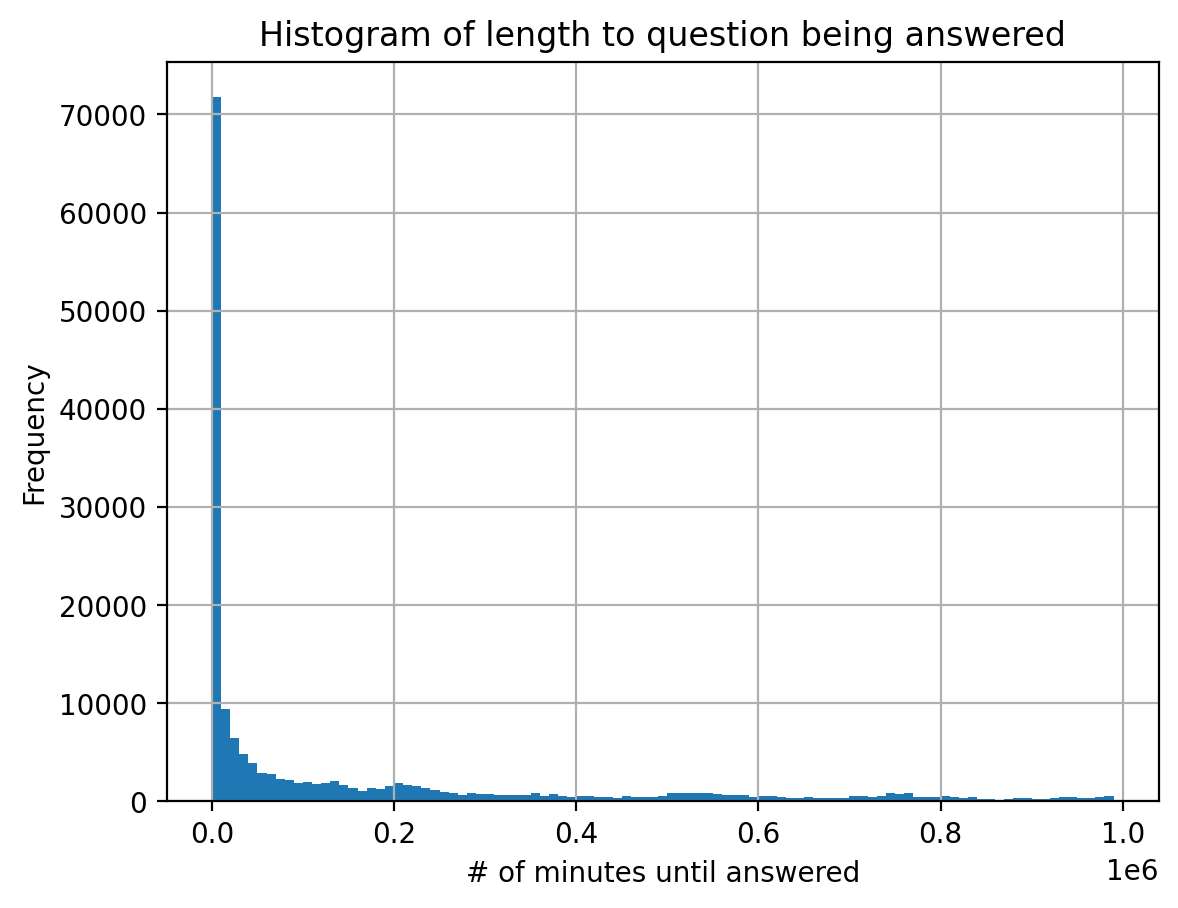

In [113]:
 # number of minutes until answered
time_nulless = (data[data['was_answered'] ==1]['time_to_answer_secs'].dropna() / 60).round(0).astype(int)
b = np.append(-100, np.array(range(0,1000000,10000)));
# b = np.array(range(-100,60000,100));
time_nulless.hist(bins=b);
plt.xlabel('# of minutes until answered')
plt.ylabel('Frequency');
plt.title('Histogram of length to question being answered');

In [104]:
time_nulless[time_nulless > 100000].shape

(69619,)

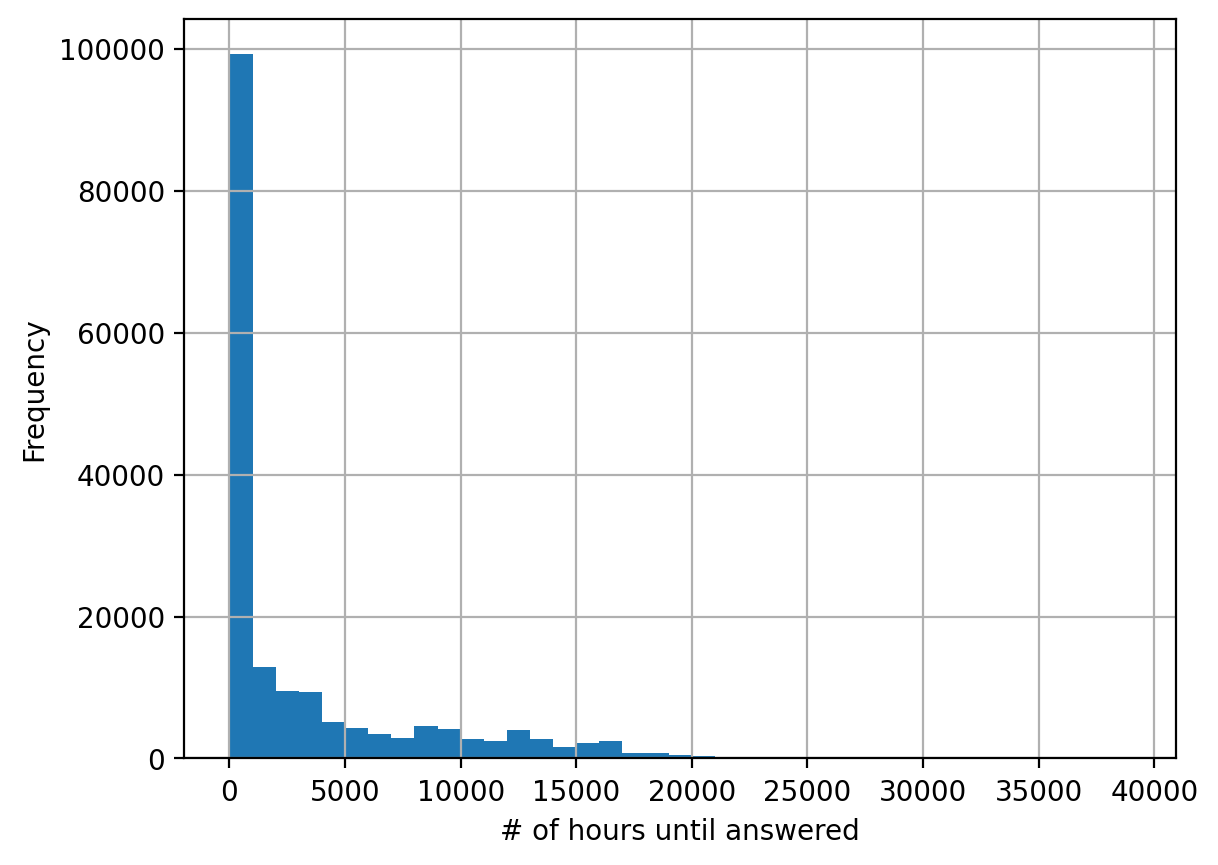

In [111]:
 # number of hours until answered
b = np.array(range(0,40000,1000));
(time_nulless/60).hist(bins=b);
plt.xlabel('# of hours until answered')
plt.ylabel('Frequency');